In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Load Clean Data

In [104]:
df = pd.read_csv('/home/fu_wang/data_clean.csv')

In [105]:
df.head()

,company_id,ticker,date,volume,price,ref_num,name,total_value
0,0,TSLA,2018-01-01,512.0,113.85,2GR86I,TESLA INC,58291.20
1,1,AAPL,2018-01-01,514.0,145.90,2L9NQX,APPLE INC,74992.60
2,2,AMZN,2018-01-01,574.0,144.08,LC28SZ,AMAZON.COM INC,82701.92
3,3,MSFT,2018-01-01,665.0,162.14,086687,MICROSOFT CORP,107823.10
4,4,FB,2018-01-01,462.0,154.04,42E4SV,META PLATFORMS INC-CLASS A,71166.48


## Validate Time Series 
1. Check no duplicates date for each ticker
2. check each ticker has the same amount of date

In [106]:
# Step 1

df[df[['ticker','date']].duplicated()]

,company_id,ticker,date,volume,price,ref_num,name,total_value


In [107]:
# Step 2
num_date = df['date'].nunique()

In [108]:
df2 = df.groupby(['ticker'])['date'].count()
df2[df.groupby(['ticker'])['date'].count()!=num_date]

Series([], Name: date, dtype: int64)

Condititon 1 and 2 are checked

### Side Note
For effiency and convinence, below I will use random sampling for plot the time series.

In [109]:
import random

In [110]:
random.seed(44)
ticker_list = random.sample(list(df['ticker']),5)
plot_df = df[df['ticker'].isin(ticker_list)]

##  Plots

### Volume

ticker
AXP     AxesSubplot(0.125,0.125;0.775x0.755)
BOX     AxesSubplot(0.125,0.125;0.775x0.755)
GEVO    AxesSubplot(0.125,0.125;0.775x0.755)
PTON    AxesSubplot(0.125,0.125;0.775x0.755)
RHI     AxesSubplot(0.125,0.125;0.775x0.755)
Name: volume, dtype: object

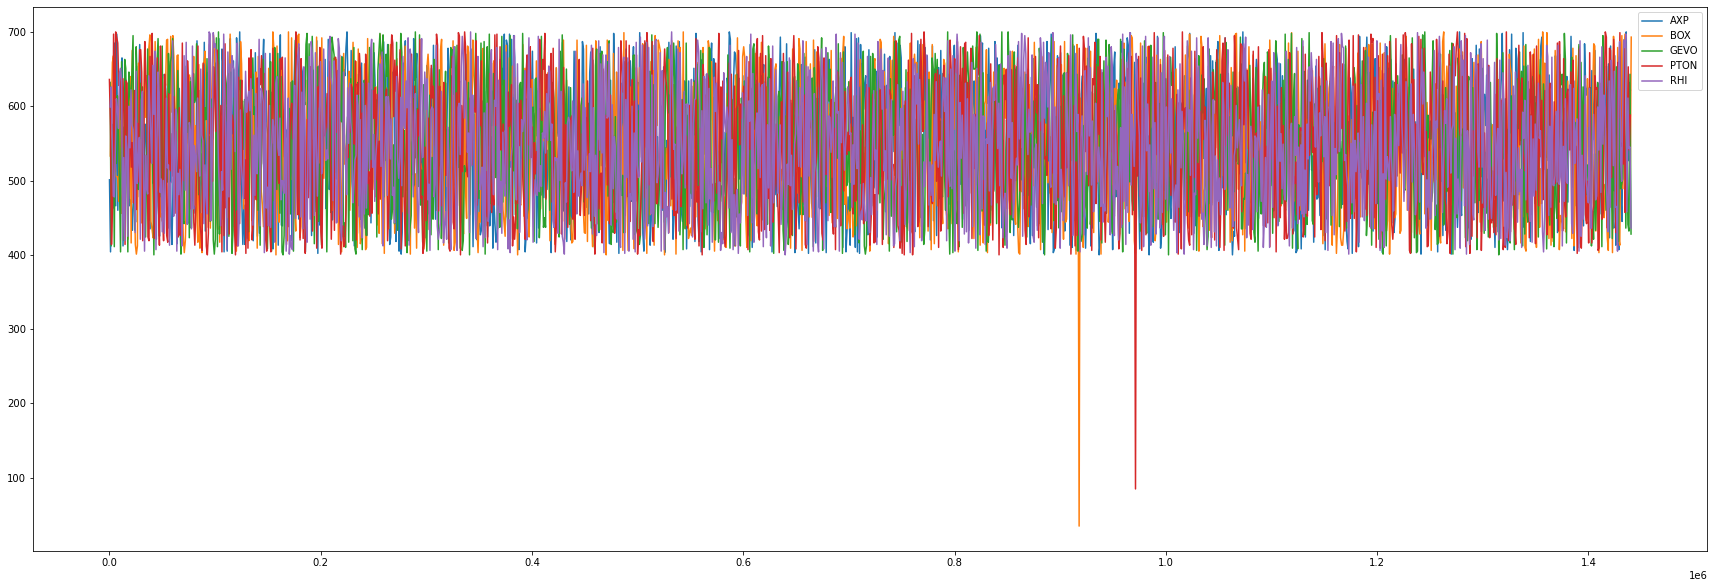

In [111]:
fig,ax = plt.subplots(1,1,figsize=(30,10))
plot_df.groupby(['ticker'])['volume'].plot(x='date',legend='True')

### Price 

ticker
AXP     AxesSubplot(0.125,0.125;0.775x0.755)
BOX     AxesSubplot(0.125,0.125;0.775x0.755)
GEVO    AxesSubplot(0.125,0.125;0.775x0.755)
PTON    AxesSubplot(0.125,0.125;0.775x0.755)
RHI     AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

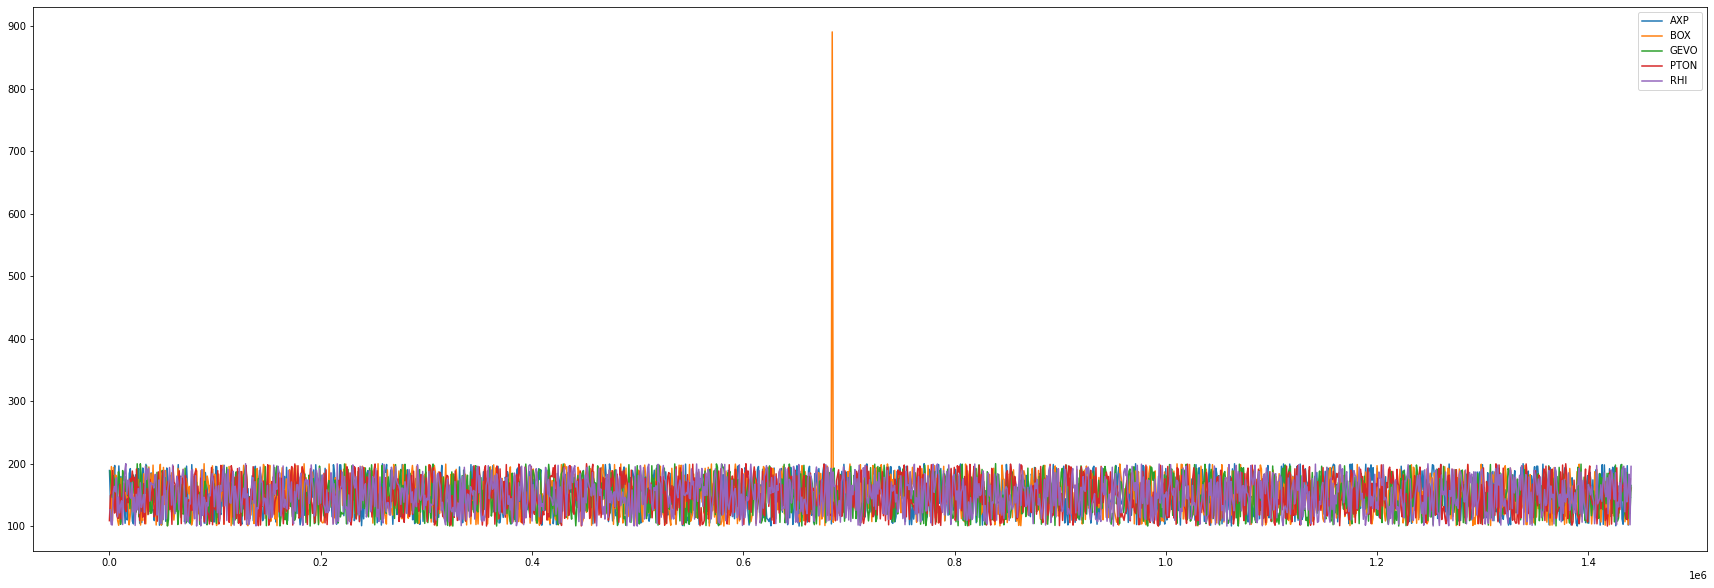

In [112]:
fig,ax = plt.subplots(1,1,figsize=(30,10))
plot_df.groupby(['ticker'])['price'].plot(x='date',legend='True')

### Total_value

ticker
AXP     AxesSubplot(0.125,0.125;0.775x0.755)
BOX     AxesSubplot(0.125,0.125;0.775x0.755)
GEVO    AxesSubplot(0.125,0.125;0.775x0.755)
PTON    AxesSubplot(0.125,0.125;0.775x0.755)
RHI     AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_value, dtype: object

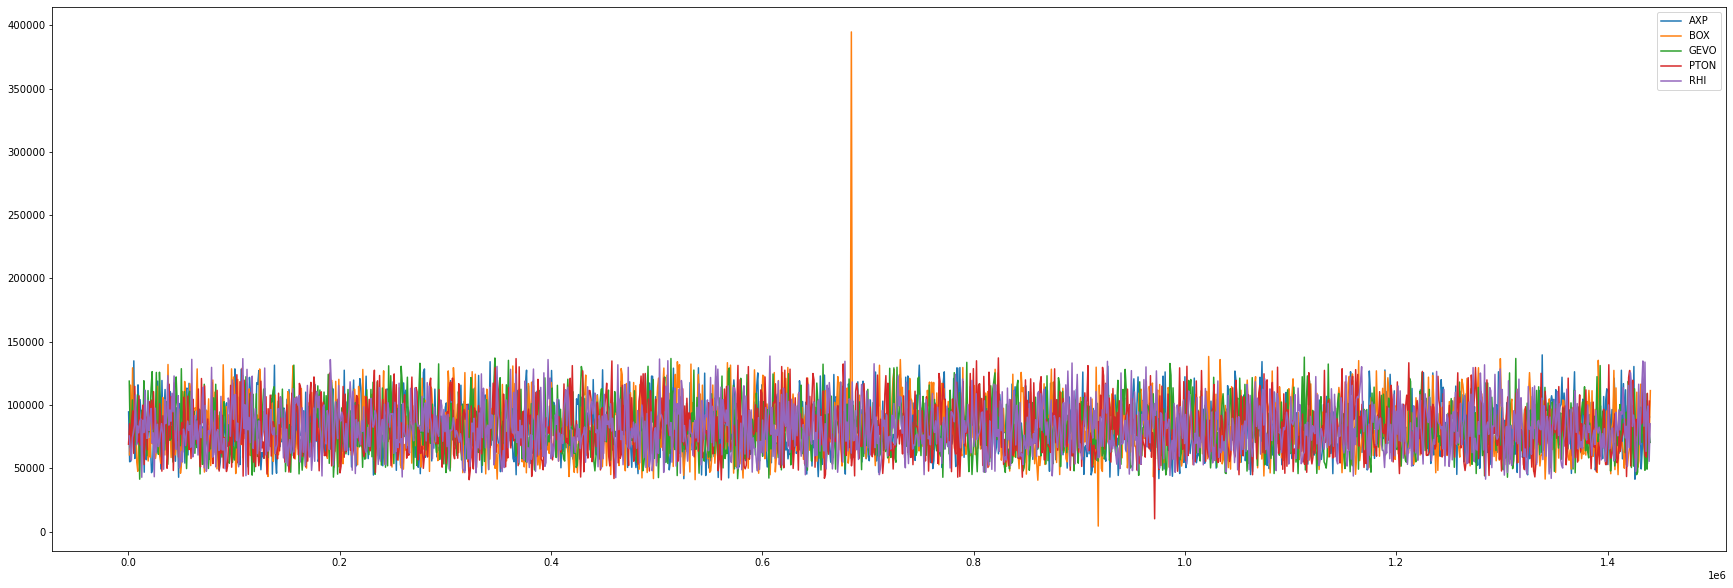

In [113]:
fig,ax = plt.subplots(1,1,figsize=(30,10))
plot_df.groupby(['ticker'])['total_value'].plot(x='date',legend='True')


### Comments:
1. From above plots we can see some obvious outliers as we haven't apply any techniques to deal with them